In [1]:
import pandas as pd


In [5]:
df_2014 = pd. read_csv("C:\\Users\\user\\Downloads\\RPC11_Input_For_Participants\\RPC11_Input_For_Participants\\datasets\\constituency_wise_results_2014.csv")

In [356]:
df_2014.head()

,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors
0,Andhra Pradesh,Adilabad,GODAM NAGESH,M,49.0,ST,TRS,Car,425762,5085,430847,1386282
1,Andhra Pradesh,Adilabad,NARESH,M,37.0,ST,INC,Hand,257994,1563,259557,1386282
2,Andhra Pradesh,Adilabad,RAMESH RATHOD,M,48.0,ST,TDP,Bicycle,182879,1319,184198,1386282
3,Andhra Pradesh,Adilabad,RATHOD SADASHIV,M,55.0,ST,BSP,Elephant,94363,57,94420,1386282
4,Andhra Pradesh,Adilabad,NETHAWATH RAMDAS,M,44.0,ST,IND,Auto- Rickshaw,41028,4,41032,1386282


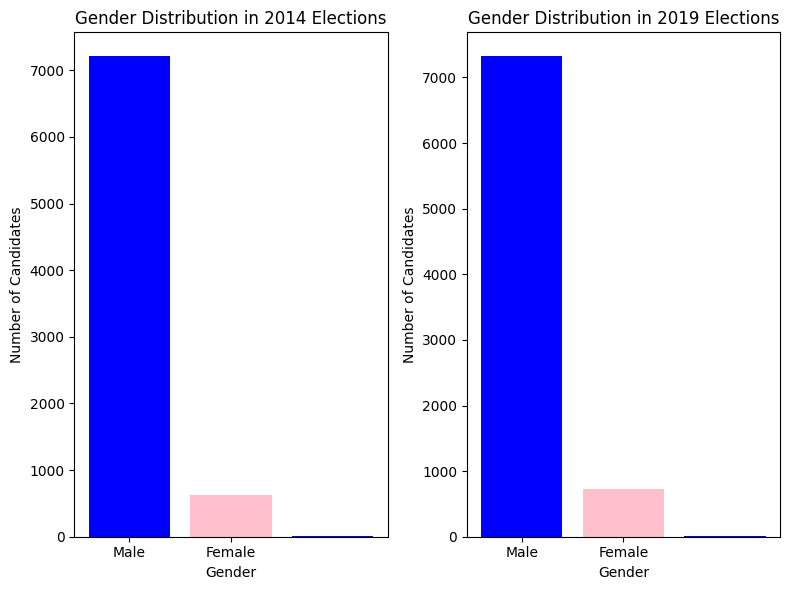

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate gender counts for each year
gender_counts_2014 = df_2014['sex'].value_counts()
gender_counts_2019 = df_2019['sex'].value_counts()

# Plotting the data
fig, ax = plt.subplots(1, 2, figsize=(8, 6))

# 2014
ax[0].bar(gender_counts_2014.index, gender_counts_2014.values, color=['blue', 'pink'])
ax[0].set_title('Gender Distribution in 2014 Elections')
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Number of Candidates')
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(['Male', 'Female'])

# 2019
ax[1].bar(gender_counts_2019.index, gender_counts_2019.values, color=['blue', 'pink'])
ax[1].set_title('Gender Distribution in 2019 Elections')
ax[1].set_xlabel('Gender')
ax[1].set_ylabel('Number of Candidates')
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(['Male', 'Female'])

plt.tight_layout()
plt.savefig("Comparison of Gender distribution in 2014 and 2019 elections.jpg")
plt.show()


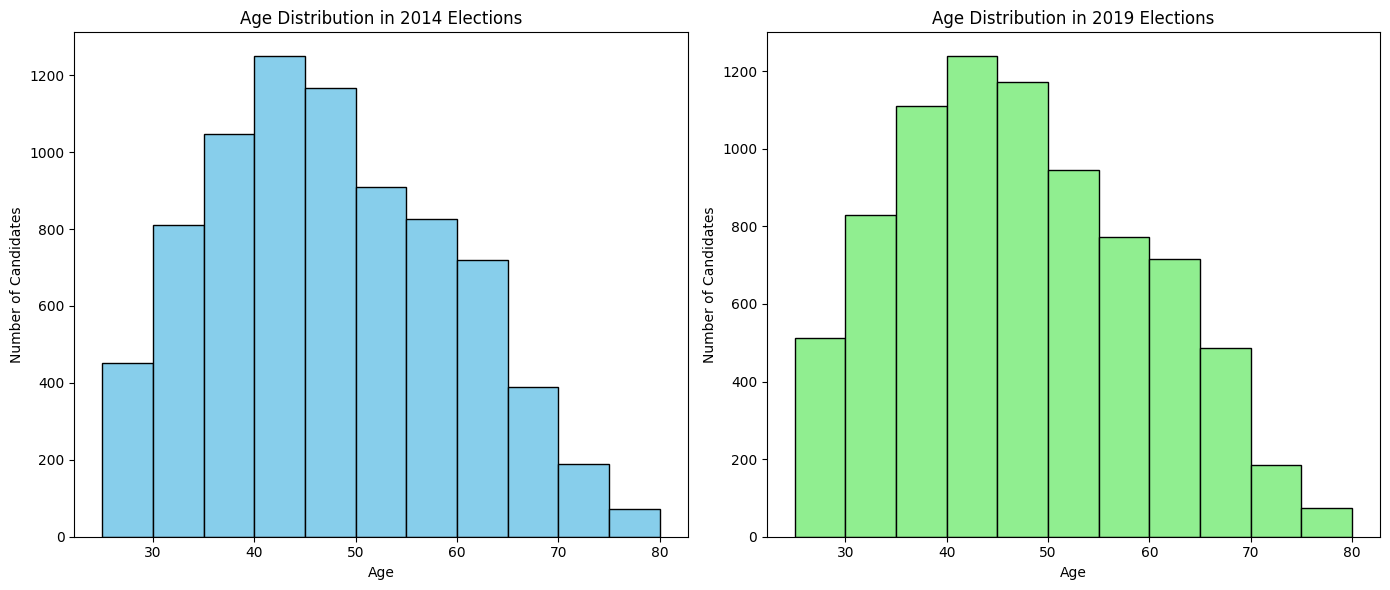

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting the data
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# 2014
ax[0].hist(df_2014['age'], bins=range(25, 85, 5), color='skyblue', edgecolor='black')
ax[0].set_title('Age Distribution in 2014 Elections')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Number of Candidates')

# 2019
ax[1].hist(df_2019['age'], bins=range(25, 85, 5), color='lightgreen', edgecolor='black')
ax[1].set_title('Age Distribution in 2019 Elections')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Number of Candidates')

plt.tight_layout()
plt.savefig("Comparison of age distribution in 2014 and 2019.jpg")
plt.show()


In [357]:
df_2014.drop(columns=['age', 'sex', 'category', 'party_symbol'], inplace=True)


In [358]:
df_2014.shape

(8355, 8)

In [6]:
df_2019 = pd.read_csv("C:\\Users\\user\\Downloads\\RPC11_Input_For_Participants\\RPC11_Input_For_Participants\\datasets\\constituency_wise_results_2019.csv")

In [457]:
df_dim_states_code = pd.read_csv("C:\\Users\\user\\Downloads\\RPC11_Input_For_Participants\\RPC11_Input_For_Participants\\datasets\\dim_states_codes.csv")

In [361]:
## Data cleaning foe df_2014

In [362]:
import pandas as pd
from fuzzywuzzy import fuzz, process
from collections import defaultdict

# List of constituencies to reassign to Telangana
constituencies_to_reassign = [
    'Adilabad', 'Peddapalle', 'Karimnagar', 'Nizamabad',
    'Zahirabad', 'Medak', 'Malkajgiri', 'Secunderabad', 'Hyderabad',
    'CHELVELLA', 'Mahbubnagar', 'Nagarkurnool', 'Nalgonda', 'Bhongir',
    'Warangal', 'Mahabubabad', 'Khammam'
]

# Step 1: Reassign Andhra Pradesh constituencies to Telangana for 2014
df_2014.loc[(df_2014['pc_name'].str.strip().isin(constituencies_to_reassign)), 'state'] = 'Telangana'

# Step 2: Preprocess Constituency Names
def preprocess_name(name):
    return name.strip().lower()

df_2014['pc_name'] = df_2014['pc_name'].apply(preprocess_name)

# Get a unique list of preprocessed constituencies
preprocessed_constituencies = df_2014['pc_name'].unique()

# Function to find closest match
def get_closest_match(name, names_list, threshold=85):
    if not names_list:  # If the list is empty, return the name itself
        return name
    match, score = process.extractOne(name, names_list)
    return match if score >= threshold else name

# Cluster names
name_clusters = defaultdict(list)
for name in preprocessed_constituencies:
    closest_match = get_closest_match(name, list(name_clusters.keys()))
    if closest_match not in name_clusters:
        name_clusters[closest_match].append(name)
    else:
        name_clusters[closest_match].append(name)

# Create a mapping from original names to standardized names
standardized_name_mapping = {}
for cluster, names in name_clusters.items():
    for name in names:
        standardized_name_mapping[name] = cluster

# Apply the mapping to standardize constituency names in the DataFrame
df_2014['pc_name'] = df_2014['pc_name'].map(standardized_name_mapping)


In [363]:
##Exploring df_2019 dataframe

In [364]:
df_2019['state'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh',
       'West Bengal', 'Chhattisgarh', 'Jharkhand', 'Uttarakhand',
       'Telangana', 'Andaman & Nicobar Islands', 'Chandigarh',
       'Dadra & Nagar Haveli', 'Daman & Diu', 'NCT OF Delhi',
       'Lakshadweep', 'Puducherry'], dtype=object)

In [365]:
df_2019.isnull().sum()

state               0
pc_name             0
candidate           0
sex               543
age               543
category          543
party               0
party_symbol      543
general_votes       0
postal_votes        0
total_votes         0
total_electors      0
dtype: int64

In [366]:
df_2019.drop(columns=['age', 'sex', 'category', 'party_symbol'], inplace=True)

In [367]:
df_2019['pc_name'].nunique()


540

In [368]:
## Data cleaning of df_2019 i.e. preproces constituency names

In [369]:
df_2019['pc_name'].unique()

array(['Aruku ', 'Srikakulam', 'Vizianagaram', 'Visakhapatnam',
       'Anakapalli', 'Kakinada', 'Amalapuram ', 'Rajahmundry',
       'Narsapuram', 'Eluru ', 'Machilipatnam ', 'Vijayawada', 'Guntur',
       'Narasaraopet', 'Bapatla ', 'Ongole ', 'Nandyal', 'Kurnool',
       'Anantapur', 'Hindupur', 'Kadapa', 'Nellore', 'Tirupati ',
       'Rajampet', 'Chittoor ', 'ARUNACHAL WEST', 'ARUNACHAL EAST',
       'Karimganj ', 'Silchar', 'Autonomous District', 'Dhubri',
       'Kokrajhar', 'Barpeta', 'Gauhati', 'Mangaldoi', 'Tezpur',
       'Nowgong', 'Kaliabor', 'Jorhat', 'Dibrugarh', 'Lakhimpur',
       'Valmiki Nagar', 'Paschim Champaran', 'Purvi Champaran', 'Sheohar',
       'Sitamarhi', 'Madhubani', 'Jhanjharpur', 'Supaul', 'Araria',
       'Kishanganj', 'Katihar', 'Purnia', 'Madhepura', 'Darbhanga',
       'Muzaffarpur', 'Vaishali', 'Gopalganj (SC)', 'Siwan',
       'Maharajganj', 'Saran', 'Hajipur (SC)', 'Ujiarpur',
       'Samastipur (SC)', 'Begusarai', 'Khagaria', 'Bhagalpur', 'Banka'

In [370]:
def preprocess_name(name):
    return name.strip().lower()

df_2019['pc_name'] = df_2019['pc_name'].apply(preprocess_name)

In [371]:
df_2019.head()

,state,pc_name,candidate,party,general_votes,postal_votes,total_votes,total_electors
0,Andhra Pradesh,aruku,KISHORE CHANDRA DEO,TDP,336163,1938,338101,1451418
1,Andhra Pradesh,aruku,Dr. KOSURI KASI VISWANADHA VEERA VENKATA SATYA...,BJP,17578,289,17867,1451418
2,Andhra Pradesh,aruku,GODDETI. MADHAVI,YSRCP,557561,4629,562190,1451418
3,Andhra Pradesh,aruku,SHRUTI DEVI VYRICHERLA,INC,17656,74,17730,1451418
4,Andhra Pradesh,aruku,GANGULAIAH VAMPURU.,JnP,42245,549,42794,1451418


In [372]:
# Remove duplicates from df_2014 based on all columns
df_2014 = df_2014.drop_duplicates()

# Remove duplicates from df_2019 based on all columns
df_2019 = df_2019.drop_duplicates()


In [373]:
##No duplicates in the dataframes.

In [374]:
## Start answering the quesions

In [375]:
# Calculate voter turnout ratio for each dataframe
df_2014['turnout_ratio'] = df_2014['total_votes'] / df_2014['total_electors']
df_2019['turnout_ratio'] = df_2019['total_votes'] / df_2019['total_electors']

# Add a year column for differentiation
df_2014['year'] = 2014
df_2019['year'] = 2019

In [376]:
df_2014.head()

,state,pc_name,candidate,party,general_votes,postal_votes,total_votes,total_electors,turnout_ratio,year
0,Telangana,adilabad,GODAM NAGESH,TRS,425762,5085,430847,1386282,0.310793,2014
1,Telangana,adilabad,NARESH,INC,257994,1563,259557,1386282,0.187232,2014
2,Telangana,adilabad,RAMESH RATHOD,TDP,182879,1319,184198,1386282,0.132872,2014
3,Telangana,adilabad,RATHOD SADASHIV,BSP,94363,57,94420,1386282,0.068110,2014
4,Telangana,adilabad,NETHAWATH RAMDAS,IND,41028,4,41032,1386282,0.029599,2014


In [377]:
## create dimension tables for states and constituencies

In [378]:
import pandas as pd

# Assuming df_2014 and df_2019 are your dataframes

# Extract unique states from df_2014 and df_2019
dim1_states_2014 = df_2014['state'].unique()
dim1_states_2019 = df_2019['state'].unique()

# Combine unique states from both years and remove duplicates
all_states = pd.unique(pd.concat([pd.Series(dim1_states_2014), pd.Series(dim1_states_2019)]))

# Create a dimension table for states
states = pd.DataFrame({
    'state_id': range(1, len(all_states) + 1),
    'state_name': all_states
})

# Extract unique constituencies from df_2014 and df_2019
dim1_constituencies_2014 = df_2014['pc_name'].unique()
dim1_constituencies_2019 = df_2019['pc_name'].unique()

# Combine unique constituencies from both years and remove duplicates
all_constituencies = pd.unique(pd.concat([pd.Series(dim1_constituencies_2014), pd.Series(dim1_constituencies_2019)]))

# Create a dimension table for constituencies
constituencies = pd.DataFrame({
    'constituency_id': range(1, len(all_constituencies) + 1),
    'constituency_name': all_constituencies
})

# Merge df_2014 with states to add state_id
dim1_2014 = df_2014.merge(states, left_on='state', right_on='state_name', how='left')
dim1_2014.drop('state_name', axis=1, inplace=True)

# Merge df_2014 with constituencies to add constituency_id
dim1_2014 = dim1_2014.merge(constituencies, left_on='pc_name', right_on='constituency_name', how='left')
dim1_2014.drop(['constituency_name'], axis=1, inplace=True)

# Merge df_2019 with states to add state_id
dim1_2019 = df_2019.merge(states, left_on='state', right_on='state_name', how='left')
dim1_2019.drop('state_name', axis=1, inplace=True)

# Merge df_2019 with constituencies to add constituency_id
dim1_2019 = df_2019.merge(constituencies, left_on='pc_name', right_on='constituency_name', how='left')
dim1_2019.drop(['constituency_name'], axis=1, inplace=True)

# Check for NaNs in constituency_id column in dim1_2014
nan_constituencies_2014 = dim1_2014[dim1_2014['constituency_id'].isna()]['pc_name'].unique()
print("Constituencies in 2014 with no match:", nan_constituencies_2014)

# Check for NaNs in constituency_id column in dim1_2019
nan_constituencies_2019 = dim1_2019[dim1_2019['constituency_id'].isna()]['pc_name'].unique()
print("Constituencies in 2019 with no match:", nan_constituencies_2019)

# The resulting dataframes dim1_2014 and dim1_2019 now include state_id and constituency_id columns.


Constituencies in 2014 with no match: []
Constituencies in 2019 with no match: []


In [379]:
dim1_2019.head()

,state,pc_name,candidate,party,general_votes,postal_votes,total_votes,total_electors,turnout_ratio,year,constituency_id
0,Andhra Pradesh,aruku,KISHORE CHANDRA DEO,TDP,336163,1938,338101,1451418,0.232945,2019,18
1,Andhra Pradesh,aruku,Dr. KOSURI KASI VISWANADHA VEERA VENKATA SATYA...,BJP,17578,289,17867,1451418,0.012310,2019,18
2,Andhra Pradesh,aruku,GODDETI. MADHAVI,YSRCP,557561,4629,562190,1451418,0.387338,2019,18
3,Andhra Pradesh,aruku,SHRUTI DEVI VYRICHERLA,INC,17656,74,17730,1451418,0.012216,2019,18
4,Andhra Pradesh,aruku,GANGULAIAH VAMPURU.,JnP,42245,549,42794,1451418,0.029484,2019,18


In [380]:
import pandas as pd

# Assuming df_2014 and df_2019 are your dataframes

# Function to calculate turnout ratio and get top and bottom constituencies
def calculate_turnout(df, year):
    # Aggregate the data by constituency
    df_agg = df.groupby('pc_name').agg({
        'total_votes': 'sum',
        'total_electors': 'sum'
    }).reset_index()

    # Calculate turnout ratio
    df_agg['turnout_ratio'] = df_agg['total_votes'] / df_agg['total_electors']

    # Sort dataframe based on turnout ratio
    df_sorted = df_agg.sort_values(by='turnout_ratio', ascending=False)

    # Get top 5 constituencies based on turnout ratio
    top_5_constituencies = df_sorted.head(5)

    # Get bottom 5 constituencies based on turnout ratio
    bottom_5_constituencies = df_sorted.tail(5)

    # Display results
    print(f"Top 5 Constituencies in {year} based on Turnout Ratio:")
    print(top_5_constituencies[['pc_name', 'turnout_ratio']])

    print(f"\nBottom 5 Constituencies in {year} based on Turnout Ratio:")
    print(bottom_5_constituencies[['pc_name', 'turnout_ratio']])

    return top_5_constituencies, bottom_5_constituencies

# Calculate and display results for 2014
top_5_constituencies_2014, bottom_5_constituencies_2014 = calculate_turnout(df_2014, 2014)

# Calculate and display results for 2019
top_5_constituencies_2019, bottom_5_constituencies_2019 = calculate_turnout(df_2019, 2019)


Top 5 Constituencies in 2014 based on Turnout Ratio:
         pc_name  turnout_ratio
448         tura       0.260341
312     nagaland       0.219555
120  daman & diu       0.156014
302      mizoram       0.154237
29      arambagh       0.141842

Bottom 5 Constituencies in 2014 based on Turnout Ratio:
           pc_name  turnout_ratio
317         nagpur       0.016789
286     malkajgiri       0.016422
17          amethi       0.014965
105  chennai north       0.014620
461       varanasi       0.013569
Top 5 Constituencies in 2019 based on Turnout Ratio:
            pc_name  turnout_ratio
512            tura       0.203295
363        nagaland       0.165822
362     nabarangpur       0.158754
36   arunachal east       0.144100
140     daman & diu       0.143698

Bottom 5 Constituencies in 2019 based on Turnout Ratio:
       pc_name  turnout_ratio
370    nalanda       0.013546
83     belgaum       0.011678
484   srinagar       0.011101
27    anantnag       0.004703
384  nizamabad       0.0

In [422]:
import pandas as pd

# Function to calculate turnout ratio and get top and bottom states
def calculate_turnout_by_state(df, year):
    # Aggregate the data by state
    df_agg = df.groupby('state').agg({
        'total_votes': 'sum',
        'total_electors': 'sum'
    }).reset_index()

    # Calculate turnout ratio
    df_agg['turnout_ratio'] = df_agg['total_votes'] / df_agg['total_electors']

    # Sort dataframe based on turnout ratio
    df_sorted = df_agg.sort_values(by='turnout_ratio', ascending=False)

    # Get top 5 states based on turnout ratio
    top_5_states = df_sorted.head(5)

    # Get bottom 5 states based on turnout ratio
    bottom_5_states = df_sorted.tail(5)

    # Display results
    print(f"Top 5 States in {year} based on Turnout Ratio:")
    print(top_5_states[['state', 'turnout_ratio']])

    print(f"\nBottom 5 States in {year} based on Turnout Ratio:")
    print(bottom_5_states[['state', 'turnout_ratio']])

    return top_5_states, bottom_5_states

# Calculate and display results for 2014
top_5_states_2014, bottom_5_states_2014 = calculate_turnout_by_state(df_2014, 2014)

# Calculate and display results for 2019
top_5_states_2019, bottom_5_states_2019 = calculate_turnout_by_state(df_2019, 2019)


Top 5 States in 2014 based on Turnout Ratio:
          state  turnout_ratio
23     Nagaland       0.219555
7   Daman & Diu       0.156014
21      Mizoram       0.154237
16  Lakshadweep       0.123733
27       Sikkim       0.119045

Bottom 5 States in 2014 based on Turnout Ratio:
              state  turnout_ratio
12  Jammu & Kashmir       0.031723
18      Maharashtra       0.030336
10          Haryana       0.029932
22     NCT OF Delhi       0.029765
24       Puducherry       0.026484
Top 5 States in 2019 based on Turnout Ratio:
                state  turnout_ratio
24           Nagaland       0.165822
8         Daman & Diu       0.143698
17        Lakshadweep       0.121683
21          Meghalaya       0.121504
2   Arunachal Pradesh       0.113428

Bottom 5 States in 2019 based on Turnout Ratio:
              state  turnout_ratio
27           Punjab       0.029419
13  Jammu & Kashmir       0.027211
23     NCT OF Delhi       0.025292
31        Telangana       0.024050
5        Chandigarh

In [381]:
## answer for the second question

In [382]:
import pandas as pd

# Assuming df_2014 and df_2019 are your dataframes for the respective years
# Example data structure (replace with your actual data loading process)
# df_2014 = pd.read_csv('election_data_2014.csv')
# df_2019 = pd.read_csv('election_data_2019.csv')

# Calculate winners for each year based on highest total_votes
winner_2014 = df_2014.loc[df_2014.groupby(['state', 'pc_name'])['total_votes'].idxmax()]
winner_2019 = df_2019.loc[df_2019.groupby(['state', 'pc_name'])['total_votes'].idxmax()]

# Remove duplicate entries in winner_2014
winner_2014 = winner_2014.drop_duplicates(subset='pc_name', keep='first')

# Remove duplicate entries in winner_2019
winner_2019 = winner_2019.drop_duplicates(subset='pc_name', keep='first')


# Merge the dataframes on state and pc_name
merged_winners = pd.merge(winner_2014[['state', 'pc_name', 'party']],
                          winner_2019[['state', 'pc_name', 'party']],
                          how='outer',
                          on=['state', 'pc_name'],
                          suffixes=('_2014', '_2019'))

merged_winners = merged_winners.drop_duplicates()

# Filter to find constituencies where the same party won in both elections
same_party_constituencies = merged_winners[merged_winners['party_2014'] == merged_winners['party_2019']]
print(same_party_constituencies)

              state          pc_name party_2014 party_2019
4    Andhra Pradesh            aruku      YSRCP      YSRCP
8    Andhra Pradesh           guntur        TDP        TDP
10   Andhra Pradesh           kadapa      YSRCP      YSRCP
15   Andhra Pradesh          nandyal      YSRCP      YSRCP
18   Andhra Pradesh          nellore      YSRCP      YSRCP
..              ...              ...        ...        ...
534     West Bengal     krishnanagar       AITC       AITC
535     West Bengal  maldaha dakshin        INC        INC
537     West Bengal       mathurapur       AITC       AITC
544     West Bengal           tamluk       AITC       AITC
545     West Bengal         uluberia       AITC       AITC

[304 rows x 4 columns]


In [383]:
## answer to the 3rd question


In [384]:
import pandas as pd

# Assuming df_2014 and df_2019 are your dataframes

# Normalize constituency names to lowercase and strip any extra spaces
df_2014['pc_name'] = df_2014['pc_name'].str.lower().str.strip()
df_2019['pc_name'] = df_2019['pc_name'].str.lower().str.strip()

# Step 1: Determine the winner for each constituency
def determine_winner(df):
    return df.loc[df.groupby('pc_name')['total_votes'].idxmax()]

winners_2014 = determine_winner(df_2014)
winners_2019 = determine_winner(df_2019)

# Step 2: Merge dataframes on constituency to compare winners
merged = pd.merge(winners_2014[['state', 'pc_name', 'party', 'total_votes']],
                  winners_2019[['state', 'pc_name', 'party', 'total_votes']],
                  how='inner',
                  on=['state', 'pc_name'],
                  suffixes=('_2014', '_2019'))

# Step 3: Find constituencies with different winning parties
different_winners = merged[merged['party_2014'] != merged['party_2019']]

# Step 4: Calculate vote percentage for winners in both years
# Aggregate total votes for calculating percentages
df_2014_agg = df_2014.groupby('pc_name')['total_votes'].sum().reset_index().rename(columns={'total_votes': 'total_votes_2014_sum'})
df_2019_agg = df_2019.groupby('pc_name')['total_votes'].sum().reset_index().rename(columns={'total_votes': 'total_votes_2019_sum'})

# Merge aggregated totals to the different_winners dataframe
different_winners = pd.merge(different_winners, df_2014_agg, on='pc_name', how='left')
different_winners = pd.merge(different_winners, df_2019_agg, on='pc_name', how='left')

# Calculate the vote percentage for winners
different_winners['total_votes_2014_pct'] = (different_winners['total_votes_2014'] / 
                                             different_winners['total_votes_2014_sum']) * 100
different_winners['total_votes_2019_pct'] = (different_winners['total_votes_2019'] / 
                                             different_winners['total_votes_2019_sum']) * 100

# Step 5: Calculate the difference in vote percentage
different_winners['vote_pct_diff'] = (different_winners['total_votes_2019_pct'] - 
                                      different_winners['total_votes_2014_pct']).abs()

# Step 6: Sort by vote percentage difference and select top 10
top_10_diff = different_winners.sort_values(by='vote_pct_diff', ascending=False).head(10)

# Display results
#print("Top 10 Constituencies with Different Winning Parties (Based on Vote Percentage Difference):")
#print(top_10_diff[['state', 'pc_name', 'party_2014', 'total_votes_2014', 'party_2019', 'total_votes_2019', 'total_votes_2014_pct', 'total_votes_2019_pct', 'vote_pct_diff']])


In [385]:
top_10_diff.head(10)

,state,pc_name,party_2014,total_votes_2014,party_2019,total_votes_2019,total_votes_2014_sum,total_votes_2019_sum,total_votes_2014_pct,total_votes_2019_pct,vote_pct_diff
34,Tamil Nadu,chennai north,ADMK,434540,DMK,590986,1981523,955545,21.929597,61.848055,39.918459
54,Bihar,gopalganj (sc),BJP,478773,JD(U),568150,1712961,1024876,27.950023,55.435975,27.485951
3,West Bengal,alipurduars,AITC,362453,BJP,750804,1223566,1380217,29.622677,54.397533,24.774856
17,Assam,autonomous district,INC,213152,BJP,381316,543280,617735,39.234281,61.728087,22.493807
74,Tamil Nadu,kanniyakumari,BJP,372906,INC,627235,990742,1048377,37.639062,59.829145,22.190083
120,Puducherry,puducherry,AINRC,255826,INC,444981,740017,790760,34.570287,56.272573,21.702286
26,Bihar,bhagalpur,RJD,367623,JD(U),618254,974016,1042518,37.743014,59.303916,21.560902
132,Uttar Pradesh,sambhal,BJP,360242,SP,658006,1057002,1183469,34.081487,55.599766,21.518279
11,Jammu & Kashmir,anantnag,JKPDP,200429,JKN,40180,375279,124896,53.407998,32.170766,21.237232
68,Bihar,jhanjharpur,BJP,335481,JD(U),602391,941249,1060562,35.642110,56.799225,21.157116


In [386]:
print(different_winners.shape, same_party_constituencies.shape)

(160, 11) (304, 4)


In [387]:
# Merge different winners and same party constituencies dataframes
merged_all = pd.concat([different_winners[['state', 'pc_name']], same_party_constituencies[['state', 'pc_name']]])

# Extract unique constituency names
unique_constituencies = merged_all.drop_duplicates()

# Get the total number of unique constituencies
total_unique_constituencies = unique_constituencies.shape[0]

# Display the total number of unique constituencies
print("Total Unique Constituencies:", total_unique_constituencies)


Total Unique Constituencies: 464


In [388]:
## answer to the 4th question
##Question:Top 5 candidates based on margin difference with runners in 2014 and 2019

In [389]:
import pandas as pd

# Function to determine winner and runner-up for each constituency
def get_winners_and_runners_up(df):
    # Sort the dataframe by constituency and total_votes in descending order
    sorted_df = df.sort_values(by=['state', 'pc_name', 'total_votes'], ascending=[True, True, False])
    # Get winners
    winners = sorted_df.groupby(['state', 'pc_name']).nth(0).reset_index()
    # Get runners-up
    runners_up = sorted_df.groupby(['state', 'pc_name']).nth(1).reset_index()
    return winners, runners_up

# Get winners and runners-up for both years
winners_2014, runners_up_2014 = get_winners_and_runners_up(df_2014)
winners_2019, runners_up_2019 = get_winners_and_runners_up(df_2019)

# Merge winners and runners-up dataframes to calculate margins
merged_winners_and_runnersup_2014 = pd.merge(winners_2014, runners_up_2014, on=['state', 'pc_name'], suffixes=('_winner', '_runner_up'))
merged_winners_and_runnersup_2019 = pd.merge(winners_2019, runners_up_2019, on=['state', 'pc_name'], suffixes=('_winner', '_runner_up'))

# Calculate margin of victory for each candidate in 2014 and 2019
merged_winners_and_runnersup_2014['margin_2014'] = merged_winners_and_runnersup_2014['total_votes_winner'] - merged_winners_and_runnersup_2014['total_votes_runner_up']
merged_winners_and_runnersup_2019['margin_2019'] = merged_winners_and_runnersup_2019['total_votes_winner'] - merged_winners_and_runnersup_2019['total_votes_runner_up']

# Sort by margin and select top 5 for 2014
top_5_2014 = merged_winners_and_runnersup_2014.sort_values(by='margin_2014', ascending=False).head(5)

# Sort by margin and select top 5 for 2019
top_5_2019 = merged_winners_and_runnersup_2019.sort_values(by='margin_2019', ascending=False).head(5)

# Output the results for 2014
#print("Top 5 Candidates by Margin of Victory in 2014:")
#print(top_5_2014[['state', 'pc_name', 'candidate_winner', 'party_winner', 'margin_2014']])


# Output the results for 2019
#print("Top 5 Candidates by Margin of Victory in 2019:")
#print(top_5_2019[['state', 'pc_name', 'candidate_winner', 'party_winner', 'margin_2019']])


In [390]:
top_5_2014.head()

,index_winner,state,pc_name,candidate_winner,party_winner,general_votes_winner,postal_votes_winner,total_votes_winner,total_electors_winner,turnout_ratio_winner,...,index_runner_up,candidate_runner_up,party_runner_up,general_votes_runner_up,postal_votes_runner_up,total_votes_runner_up,total_electors_runner_up,turnout_ratio_runner_up,year_runner_up,margin_2014
108,1777,Gujarat,vadodara,NARENDRA MODI,BJP,841592,3872,845464,1638321,0.516055,...,1778,MISTRI MADHUSUDAN DEVRAM,INC,273589,1747,275336,1638321,0.168060,2014,570128
402,6062,Uttar Pradesh,ghaziabad,VIJAY KUMAR SINGH,BJP,758113,369,758482,2357553,0.321724,...,6061,RAJ BABBAR,INC,191188,34,191222,2357553,0.081110,2014,567260
100,1827,Gujarat,navsari,C. R. PATIL,BJP,818367,2464,820831,1764622,0.465160,...,1828,MAKSUD MIRZA,INC,261848,867,262715,1764622,0.148879,2014,558116
106,1818,Gujarat,surat,DARSHANA VIKRAM JARDOSH,BJP,717429,983,718412,1484068,0.484083,...,1819,DESAI NAISHADHBHAI BHUPATBHAI,INC,184904,318,185222,1484068,0.124807,2014,533190
94,1559,Gujarat,gandhinagar,L.K.ADVANI,BJP,770118,3421,773539,1733972,0.446108,...,1560,KIRITBHAI ISHVARBHAI PATEL,INC,287584,2834,290418,1733972,0.167487,2014,483121


In [391]:
top_5_2014 = top_5_2014.drop(['index_winner', 'general_votes_winner', 'postal_votes_winner', 'total_electors_winner', 'turnout_ratio_winner', 'index_runner_up', 'general_votes_runner_up',	'postal_votes_runner_up', 'total_electors_runner_up', 'turnout_ratio_runner_up', 'year_runner_up'], axis=1) 	

In [392]:
top_5_2014.head()

,state,pc_name,candidate_winner,party_winner,total_votes_winner,year_winner,candidate_runner_up,party_runner_up,total_votes_runner_up,margin_2014
108,Gujarat,vadodara,NARENDRA MODI,BJP,845464,2014,MISTRI MADHUSUDAN DEVRAM,INC,275336,570128
402,Uttar Pradesh,ghaziabad,VIJAY KUMAR SINGH,BJP,758482,2014,RAJ BABBAR,INC,191222,567260
100,Gujarat,navsari,C. R. PATIL,BJP,820831,2014,MAKSUD MIRZA,INC,262715,558116
106,Gujarat,surat,DARSHANA VIKRAM JARDOSH,BJP,718412,2014,DESAI NAISHADHBHAI BHUPATBHAI,INC,185222,533190
94,Gujarat,gandhinagar,L.K.ADVANI,BJP,773539,2014,KIRITBHAI ISHVARBHAI PATEL,INC,290418,483121


In [393]:
top_5_2019 = top_5_2019.drop(['index_winner', 'general_votes_winner', 'postal_votes_winner', 'total_electors_winner', 'turnout_ratio_winner', 'index_runner_up', 'general_votes_runner_up',	'postal_votes_runner_up', 'total_electors_runner_up', 'turnout_ratio_runner_up', 'year_runner_up'], axis=1) 

In [394]:
top_5_2019.head()

,state,pc_name,candidate_winner,party_winner,total_votes_winner,year_winner,candidate_runner_up,party_runner_up,total_votes_runner_up,margin_2019
114,Gujarat,navsari,C. R. Patil,BJP,972739,2019,PATEL DHARMESHBHAI BHIMBHAI,INC,283071,689668
129,Haryana,karnal,Sanjay Bhatia,BJP,911594,2019,Kuldip Sharma,INC,255452,656142
126,Haryana,faridabad,KRISHAN PAL,BJP,913222,2019,AVTAR SINGH BHADANA,INC,274983,638239
337,Rajasthan,bhilwara,SUBHASH CHANDRA BAHERIA,BJP,938160,2019,RAM PAL SHARMA,INC,326160,612000
122,Gujarat,vadodara,RANJANBEN BHATT,BJP,883719,2019,PRASHANT PATEL (TIKO),INC,294542,589177


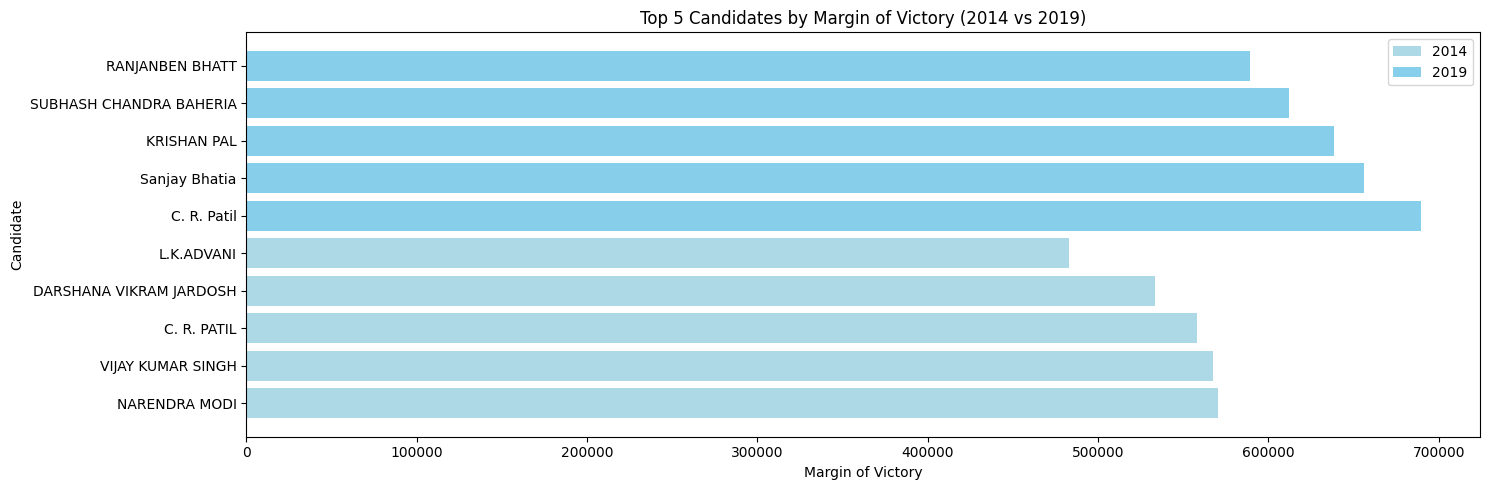

In [395]:
import matplotlib.pyplot as plt

# Concatenate the top 5 candidates for both 2014 and 2019
combined_top_5 = pd.concat([top_5_2014, top_5_2019])

# Plotting the horizontal bar chart
plt.figure(figsize=(15, 5))
plt.barh(combined_top_5['candidate_winner'], combined_top_5['margin_2014'], color='lightblue', label='2014')
plt.barh(combined_top_5['candidate_winner'], combined_top_5['margin_2019'], color='skyblue', label='2019')
plt.xlabel('Margin of Victory')
plt.ylabel('Candidate')
plt.title('Top 5 Candidates by Margin of Victory (2014 vs 2019)')
plt.legend()
plt.tight_layout()
plt.savefig("Top candidates based on margin of difference with runners.png")
# Display the plot
plt.show()


In [396]:
## ANSWER TO THE 10TH QUESTION

In [426]:
import pandas as pd

# Function to find the constituency with the most NOTA votes
def constituency_with_most_nota_votes(df, year):
    # Filter the dataframe to get only the rows where the candidate or party is NOTA
    nota_votes_df = df[df['party'] == 'NOTA']  # Adjust column name if NOTA is under 'party' instead of 'candidate'
    
    # Find the constituency with the highest number of NOTA votes
    max_nota_votes = nota_votes_df['total_votes'].max()
    max_nota_constituency = nota_votes_df[nota_votes_df['total_votes'] == max_nota_votes]
    
    # Return the details
    return max_nota_constituency[['state', 'pc_name', 'total_votes']]

# Find the constituency with the most NOTA votes in 2014
most_nota_2014 = constituency_with_most_nota_votes(df_2014, 2014)
print("Constituency with the most NOTA votes in 2014:")
print(most_nota_2014)

# Find the constituency with the most NOTA votes in 2019
most_nota_2019 = constituency_with_most_nota_votes(df_2019, 2019)
print("Constituency with the most NOTA votes in 2019:")
print(most_nota_2019)


Constituency with the most NOTA votes in 2014:
           state   pc_name  total_votes
5416  Tamil Nadu  nilgiris        46559
Constituency with the most NOTA votes in 2019:
     state         pc_name  total_votes
798  Bihar  gopalganj (sc)        51660


In [428]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate state-wise NOTA votes
def calculate_nota_votes_statewise(df, year):
    # Filter the dataframe to get only the rows where the party is NOTA
    nota_votes_df = df[df['party'] == 'NOTA']
    
    # Group by state and sum the total votes
    statewise_nota_votes = nota_votes_df.groupby('state')['total_votes'].sum().reset_index()
    
    # Add the year column
    statewise_nota_votes['year'] = year
    
    return statewise_nota_votes

# Calculate state-wise NOTA votes for 2014
statewise_nota_votes_2014 = calculate_nota_votes_statewise(df_2014, 2014)

# Calculate state-wise NOTA votes for 2019
statewise_nota_votes_2019 = calculate_nota_votes_statewise(df_2019, 2019)

# Combine the dataframes for both years
nota_votes_combined = pd.concat([statewise_nota_votes_2014, statewise_nota_votes_2019])


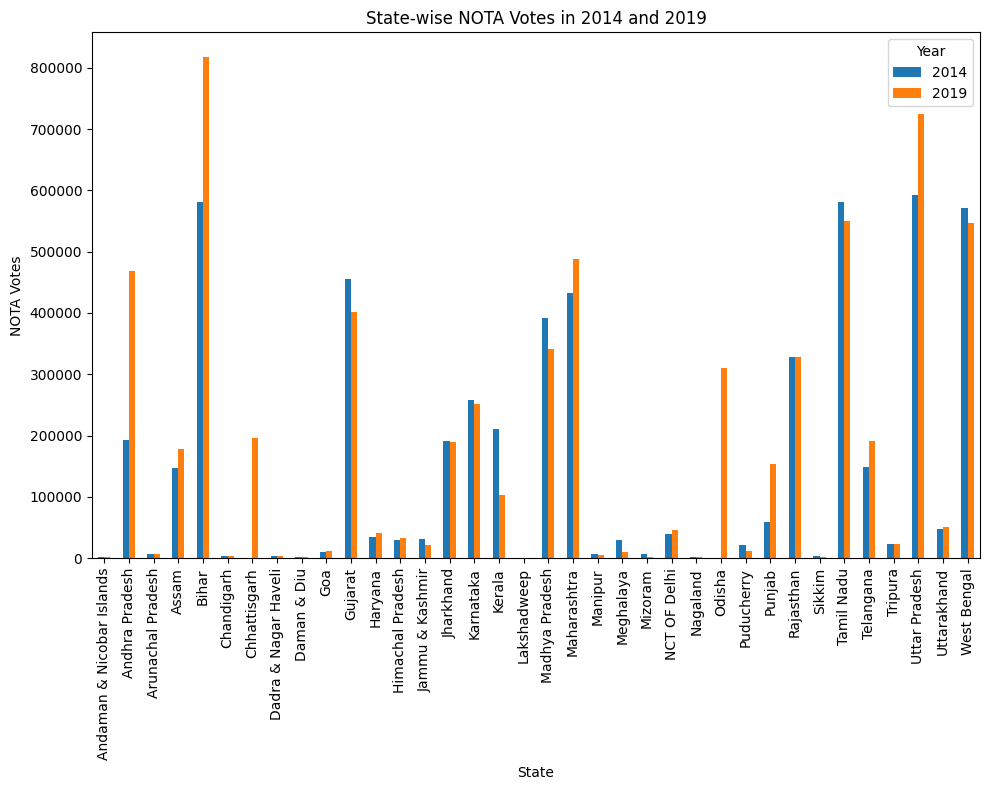

In [431]:
# Pivot the dataframe to have states as rows and years as columns
pivot_data = nota_votes_combined.pivot(index='state', columns='year', values='total_votes').fillna(0)

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 8))

# Plot bars for 2014 and 2019
pivot_data.plot(kind='bar', ax=ax)

# Add labels and title
ax.set_xlabel('State')
ax.set_ylabel('NOTA Votes')
ax.set_title('State-wise NOTA Votes in 2014 and 2019')
ax.legend(title='Year')

# Show the plot
plt.tight_layout()
plt.savefig("NOTA votes in 2014 and 2019.png")
plt.show()


In [398]:
## question : % split of votes among parties in 2014 and 2019

In [399]:
import pandas as pd

# Function to calculate vote percentage for each party at the national level
def calculate_vote_percentage_national(df, year):
    # Group by party and sum the votes
    party_votes = df.groupby('party')['total_votes'].sum().reset_index()
    
    # Calculate total votes for the entire country
    total_votes = df['total_votes'].sum()
    
    # Calculate vote percentage for each party
    party_votes['vote_percentage'] = (party_votes['total_votes'] / total_votes) * 100
    
    # Add year column
    party_votes['year'] = year
    
    return party_votes

# Calculate vote percentages for 2014 and 2019 at the national level
vote_split_percentage_national_2014 = calculate_vote_percentage_national(df_2014, 2014)
vote_split_percentage_national_2019 = calculate_vote_percentage_national(df_2019, 2019)

In [400]:
# Function to group parties with less than 10% vote share into 'Others'
def group_others(df):
    # Identify parties with less than 10% vote share
    others = df['vote_percentage'] < 10
    
    # Separate the 'Others' and main parties
    main_parties = df[~others]
    others_parties = df[others]
    
    # Sum the votes and vote percentage for 'Others'
    others_summary = pd.DataFrame({
        'party': ['Others'],
        'total_votes': [others_parties['total_votes'].sum()],
        'vote_percentage': [others_parties['vote_percentage'].sum()],
        'year': [others_parties['year'].iloc[0]]  # Assuming the year is the same for all rows
    })
    
    # Combine the main parties and 'Others'
    combined = pd.concat([main_parties, others_summary], ignore_index=True)
    
    return combined

# Group parties with less than 10% vote share into 'Others' for both 2014 and 2019
vote_split_percentage_national_2014 = group_others(vote_split_percentage_national_2014)
vote_split_percentage_national_2019 = group_others(vote_split_percentage_national_2019)

# Print results
print(vote_split_percentage_national_2014)
print(vote_split_percentage_national_2019)

    party  total_votes  vote_percentage  year
0     BJP    161047761        30.969622  2014
1     INC     96641749        18.584291  2014
2  Others    262328974        50.446086  2014
    party  total_votes  vote_percentage  year
0     BJP    229076879        37.298440  2019
1     INC    119495214        19.456285  2019
2  Others    265600730        43.245276  2019


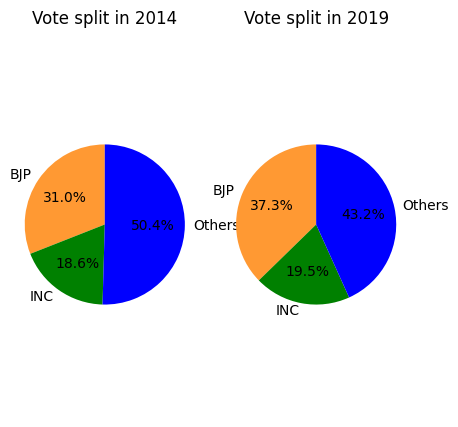

In [401]:
import matplotlib.pyplot as plt

# Data for 2014 and 2019
data_2014 = vote_split_percentage_national_2014[['party', 'vote_percentage']]
data_2019 = vote_split_percentage_national_2019[['party', 'vote_percentage']]

# Define colors for each party using hex color codes
colors_2014 = ['#FF9933' if party == 'BJP' else '#008000' if party == 'INC' else '#0000FF' for party in data_2014['party']]
colors_2019 = ['#FF9933' if party == 'BJP' else '#008000' if party == 'INC' else '#0000FF' for party in data_2019['party']]

# Pie chart for 2014
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 5))

ax1.pie(data_2014['vote_percentage'], labels=data_2014['party'], colors=colors_2014, autopct='%1.1f%%', startangle=90)
ax1.set_title('Vote split in 2014')

# Pie chart for 2019
ax2.pie(data_2019['vote_percentage'], labels=data_2019['party'], colors=colors_2019, autopct='%1.1f%%', startangle=90)
ax2.set_title('Vote split in 2019')

# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')  
ax2.axis('equal') 

# Save the figure
plt.savefig('vote_split_percentage_between_parties.png', dpi=300, bbox_inches='tight')

plt.show()


In [402]:
import pandas as pd

# Function to calculate vote percentage for each party at the state level
def calculate_vote_percentage_state(df, year):
    # Group by state and party and sum the votes
    state_party_votes = df.groupby(['state', 'party'])['total_votes'].sum().reset_index()
    
    # Calculate total votes for each state
    state_total_votes = df.groupby('state')['total_votes'].sum().reset_index()
    state_total_votes.rename(columns={'total_votes': 'state_total_votes'}, inplace=True)
    
    # Merge the state total votes with the state party votes
    merged_df = pd.merge(state_party_votes, state_total_votes, on='state')
    
    # Calculate vote percentage for each party within each state
    merged_df['vote_percentage'] = (merged_df['total_votes'] / merged_df['state_total_votes']) * 100
    
    # Add year column
    merged_df['year'] = year
    
    return merged_df

# Calculate vote percentages for 2014 and 2019 at the state level
vote_percentage_state_2014 = calculate_vote_percentage_state(df_2014, 2014)
vote_percentage_state_2019 = calculate_vote_percentage_state(df_2019, 2019)

# Pivot the dataframes to have years as columns
#pivot_2014 = vote_percentage_state_2014.pivot_table(index=['state', 'party'], columns='year', values='vote_percentage').reset_index()
#pivot_2019 = vote_percentage_state_2019.pivot_table(index=['state', 'party'], columns='year', values='vote_percentage').reset_index()

# Merge the pivoted dataframes to get a side-by-side comparison
#combined_vote_percentage_state = pd.merge(pivot_2014, pivot_2019, on=['state', 'party'], suffixes=('_2014', '_2019'))

# Output the results
##print("Vote percentage split for parties in 2014 vs 2019 at the state level (side by side):")
##print(combined_pivot)

# Optional: Save the result to a CSV file for further analysis
# combined_pivot.to_csv('vote_percentage_state_2014_2019_side_by_side.csv', index=False)


C:\Users\user\AppData\Local\Temp\ipykernel_14440\3839627754.py:25: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_14440\3839627754.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
C:\python 310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


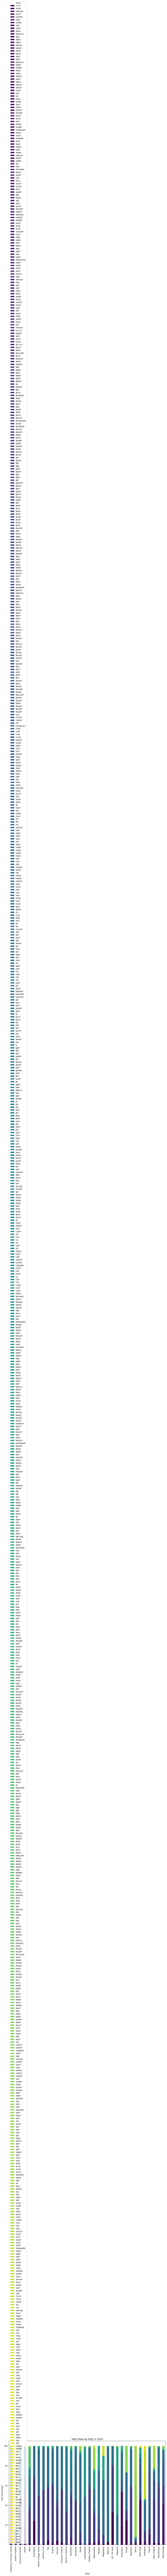

C:\Users\user\AppData\Local\Temp\ipykernel_14440\3839627754.py:25: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_14440\3839627754.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
C:\python 310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


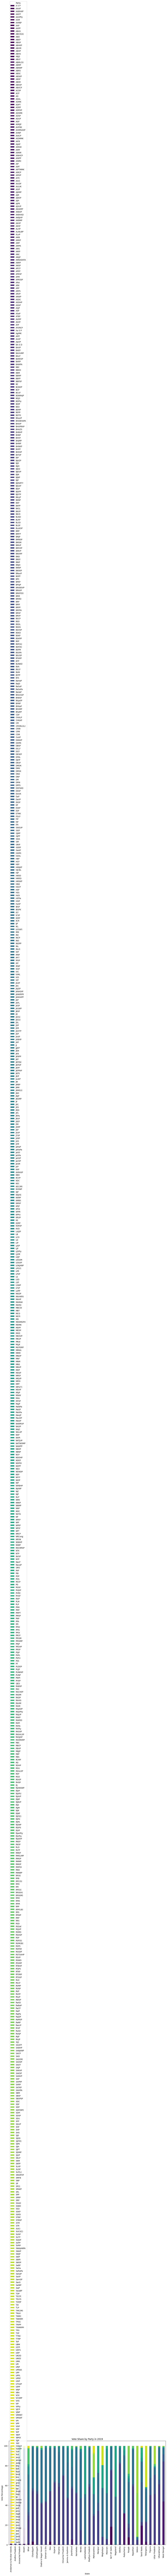

In [405]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming vote_percentage_state_2014 and vote_percentage_state_2019 are already calculated

# Combine data for both years
combined_data = pd.concat([vote_percentage_state_2014, vote_percentage_state_2019])

# Pivot the data for easier plotting
pivot_data = combined_data.pivot_table(index=['state', 'year'], columns='party', values='vote_percentage').reset_index()

# Plot the stacked bar chart for each year
def plot_stacked_bar(data, year):
    data_year = data[data['year'] == year].copy()
    data_year.set_index('state', inplace=True)
    data_year.drop(columns='year', inplace=True)
    
    # Plotting
    ax = data_year.plot(kind='bar', stacked=True, figsize=(15, 10), cmap='viridis')
    plt.title(f'Vote Share by Party in {year}')
    plt.xlabel('State')
    plt.ylabel('Vote Percentage')
    plt.legend(title='Party')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Plot for 2014
plot_stacked_bar(pivot_data, 2014)

# Plot for 2019
plot_stacked_bar(pivot_data, 2019)


In [406]:
import pandas as pd

# Function to calculate vote percentage for each party group at the state level
def calculate_vote_percentage_state(df, year):
    # Group parties into BJP, INC, and Others
    df['party_group'] = df['party'].apply(lambda x: 'BJP' if x == 'BJP' else ('INC' if x == 'INC' else 'Others'))
    
    # Group by state and party group and sum the votes
    state_party_votes = df.groupby(['state', 'party_group'])['total_votes'].sum().reset_index()
    
    # Calculate total votes for each state
    state_total_votes = df.groupby('state')['total_votes'].sum().reset_index()
    state_total_votes.rename(columns={'total_votes': 'state_total_votes'}, inplace=True)
    
    # Merge the state total votes with the state party group votes
    merged_df = pd.merge(state_party_votes, state_total_votes, on='state')
    
    # Calculate vote percentage for each party group within each state
    merged_df['vote_percentage'] = (merged_df['total_votes'] / merged_df['state_total_votes']) * 100
    
    # Add year column
    merged_df['year'] = year
    
    return merged_df

# Calculate vote percentages for 2014 and 2019 at the state level
vote_percentage_state_2014 = calculate_vote_percentage_state(df_2014, 2014)
vote_percentage_state_2019 = calculate_vote_percentage_state(df_2019, 2019)


In [432]:
import pandas as pd

# Assuming df_2014 and df_2019 are your dataframes

# Function to group parties into Major and Others based on national vote percentage
def group_parties(df):
    # Calculate total votes for each party at the national level
    national_votes = df.groupby('party')['total_votes'].sum().reset_index()
    
    # Calculate the total national votes
    total_national_votes = national_votes['total_votes'].sum()
    
    # Identify parties with less than 10% of national votes
    national_votes['vote_percentage'] = (national_votes['total_votes'] / total_national_votes) * 100
    minor_parties = national_votes[national_votes['vote_percentage'] < 10]['party'].tolist()
    
    # Group minor parties into "Others"
    df['party_grouped'] = df['party'].apply(lambda x: 'Others' if x in minor_parties else x)
    
    return df

# Group parties for 2014 and 2019 dataframes
df_2014_grouped = group_parties(df_2014)
df_2019_grouped = group_parties(df_2019)


In [440]:
# Function to calculate the percentage split of votes at the state level
def calculate_statewise_vote_split(df, year):
    # Group by state and party and sum the votes
    state_party_votes = df.groupby(['state', 'party_grouped'])['total_votes'].sum().reset_index()
    
    # Calculate total votes for each state
    state_total_votes = df.groupby('state')['total_votes'].sum().reset_index()
    state_total_votes.rename(columns={'total_votes': 'state_total_votes'}, inplace=True)
    
    # Merge the state total votes with the state party votes
    merged_df = pd.merge(state_party_votes, state_total_votes, on='state')
    
    # Calculate vote percentage for each party within each state
    merged_df['vote_percentage'] = (merged_df['total_votes'] / merged_df['state_total_votes']) * 100
    
    # Add year column
    merged_df['year'] = year
    
    return merged_df

# Calculate vote percentages for 2014 and 2019 at the state level
statewise_vote_split_2014 = calculate_statewise_vote_split(df_2014_grouped, 2014)
statewise_vote_split_2019 = calculate_statewise_vote_split(df_2019_grouped, 2019)

# Combine the dataframes for both years
#statewise_vote_split_combined = pd.concat([statewise_vote_split_2014, statewise_vote_split_2019])


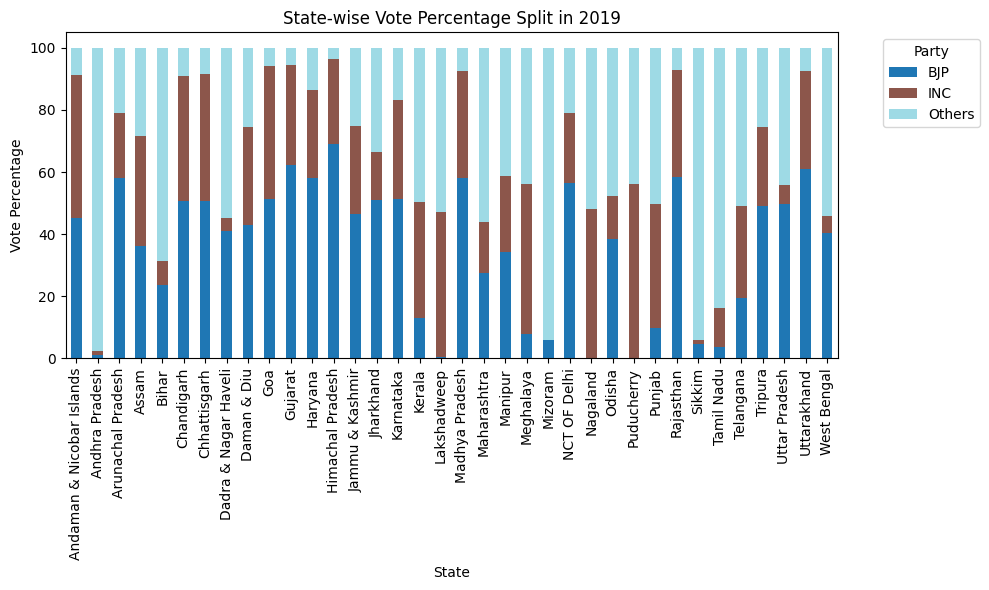

In [466]:
# Function to plot the state-wise vote percentage split
def plot_statewise_vote_split(data, year):
    # Pivot the dataframe to have states as rows and party groups as columns
    pivot_data = data.pivot(index='state', columns='party_grouped', values='vote_percentage').fillna(0)
    
    # Plot the stacked bar chart
    pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
    plt.title(f'State-wise Vote Percentage Split in {year}')
    plt.ylabel('Vote Percentage')
    plt.xlabel('State')
    plt.legend(title='Party', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig("% split of votes between parties at state level in 2019.png")
    plt.show()

# Plot state-wise vote percentage split for 2014
plot_statewise_vote_split(statewise_vote_split_2019, 2019)

# Plot state-wise vote percentage split for 2019

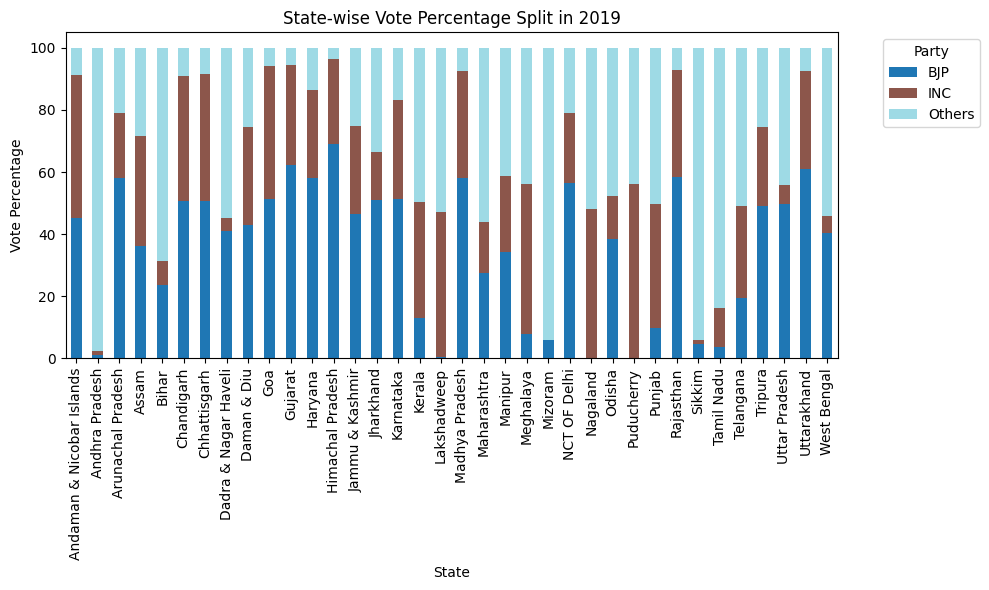

<Figure size 640x480 with 0 Axes>

In [464]:
# Plot state-wise vote percentage split for 2019
plot_statewise_vote_split(statewise_vote_split_2019, 2019)
plt.savefig("% split of votes bw parties in 2019.png")

In [ ]:
## question no:8

In [408]:
import pandas as pd

# Example data loading
# df_2014 = pd.read_csv('election_2014.csv')
# df_2019 = pd.read_csv('election_2019.csv')

# Filter for BJP and INC candidates
parties = ['BJP', 'INC']
df_2014_filtered = df_2014[df_2014['party'].isin(parties)]
df_2019_filtered = df_2019[df_2019['party'].isin(parties)]

# Calculate vote share for each candidate
df_2014_filtered['vote_share_2014'] = df_2014_filtered['total_votes'] / df_2014_filtered['total_electors'] * 100
df_2019_filtered['vote_share_2019'] = df_2019_filtered['total_votes'] / df_2019_filtered['total_electors'] * 100

# Keep the candidate with the highest vote share in each constituency for each year
df_2014_max = df_2014_filtered.loc[df_2014_filtered.groupby(['state', 'pc_name', 'party'])['vote_share_2014'].idxmax()]
df_2019_max = df_2019_filtered.loc[df_2019_filtered.groupby(['state', 'pc_name', 'party'])['vote_share_2019'].idxmax()]

# Merge DataFrames on state and pc_name
merged_df = pd.merge(df_2014_max[['state', 'pc_name', 'party', 'vote_share_2014']], 
                     df_2019_max[['state', 'pc_name', 'party', 'vote_share_2019']], 
                     on=['state', 'pc_name', 'party'], 
                     how='inner')

# Calculate gain in vote share
merged_df['vote_share_gain'] = merged_df['vote_share_2019'] - merged_df['vote_share_2014']

# Get top 5 constituencies for BJP
bjp_top5 = merged_df[merged_df['party'] == 'BJP'].sort_values(by='vote_share_gain', ascending=False).head(5)

# Get top 5 constituencies for INC
inc_top5 = merged_df[merged_df['party'] == 'INC'].sort_values(by='vote_share_gain', ascending=False).head(5)

# Display the results
print("Top 5 Constituencies for BJP:")
print(bjp_top5[['state', 'pc_name', 'vote_share_gain']])

print("\nTop 5 Constituencies for INC:")
print(inc_top5[['state', 'pc_name', 'vote_share_gain']])


Top 5 Constituencies for BJP:
           state       pc_name  vote_share_gain
472      Tripura  tripura west        37.078490
666  West Bengal       purulia        34.733903
670  West Bengal      ranaghat        29.867724
646  West Bengal      jhargram        29.861137
642  West Bengal    jalpaiguri        29.331368

Top 5 Constituencies for INC:
          state          pc_name  vote_share_gain
442  Tamil Nadu            karur        47.802031
438  Tamil Nadu            arani        40.605498
449  Tamil Nadu  tiruchirappalli        37.457635
443  Tamil Nadu      krishnagiri        37.125729
448  Tamil Nadu      thiruvallur        36.829988


C:\Users\user\AppData\Local\Temp\ipykernel_14440\454972377.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2014_filtered['vote_share_2014'] = df_2014_filtered['total_votes'] / df_2014_filtered['total_electors'] * 100
C:\Users\user\AppData\Local\Temp\ipykernel_14440\454972377.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019_filtered['vote_share_2019'] = df_2019_filtered['total_votes'] / df_2019_filtered['total_electors'] * 100


In [409]:
bjp_top5.head()

,state,pc_name,party,vote_share_2014,vote_share_2019,vote_share_gain
472,Tripura,tripura west,BJP,5.315643,42.394133,37.078490
666,West Bengal,purulia,BJP,5.858691,40.592593,34.733903
670,West Bengal,ranaghat,BJP,14.578416,44.446141,29.867724
646,West Bengal,jhargram,BJP,8.301675,38.162812,29.861137
642,West Bengal,jalpaiguri,BJP,14.469310,43.800678,29.331368


In [ ]:
## Question no:11

In [419]:
import pandas as pd

# Assuming df_2019 is your dataframe for the election results from 2019

# Step 1: Calculate Party Vote Share at State Level
# Group by state and party to get the total votes for each party in each state
state_party_votes = df_2019.groupby(['state', 'party'])['total_votes'].sum().reset_index()

# Calculate the total votes for each state
state_total_votes = df_2019.groupby('state')['total_votes'].sum().reset_index()
state_total_votes.rename(columns={'total_votes': 'state_total_votes'}, inplace=True)

# Merge the state total votes with the state party votes
state_party_votes = pd.merge(state_party_votes, state_total_votes, on='state')

# Calculate the vote share for each party within each state
state_party_votes['vote_share'] = (state_party_votes['total_votes'] / state_party_votes['state_total_votes']) * 100

# Step 2: Filter Parties with Less Than 10% Vote Share
low_vote_share_parties = state_party_votes[state_party_votes['vote_share'] < 10]

# Step 3: Determine Winning Candidates
# Sort by total votes within each constituency and get the winner
winners_2019 = df_2019.loc[df_2019.groupby('pc_name')['total_votes'].idxmax()]

# Step 4: Filter Constituencies with Winning Candidates from Low Vote Share Parties
# Merge winners with the low vote share parties to identify matching constituencies
winners_with_low_vote_share_parties = pd.merge(winners_2019, low_vote_share_parties, on=['state', 'party'], how='inner')

# Select relevant columns for the output
winners_with_low_vote_share_parties = winners_with_low_vote_share_parties[['state','pc_name', 'candidate', 'party']]

# Output the results
##print("Constituencies with elected candidates whose party has less than 10% vote share at the state level in 2019:")
##print([result])


In [421]:
winners_with_low_vote_share_parties['pc_name'].unique()

array(['amravati', 'anantnag', 'baharampur', 'baramulla', 'chidambaram',
       'coimbatore', 'dhubri', 'giridih', 'gurdaspur', 'hajipur (sc)',
       'hassan', 'hoshiarpur', 'hyderabad', 'jamui (sc)', 'khagaria',
       'kishanganj', 'kokrajhar', 'kollam', 'kottayam', 'madurai',
       'malappuram', 'maldaha dakshin', 'mandya', 'mirzapur',
       'nagapattinam', 'nagaur', 'nawada', 'ponnani', 'rae bareli',
       'ramanathapuram', 'robertsganj', 'samastipur (sc)', 'sangrur',
       'srinagar', 'tiruppur', 'vaishali'], dtype=object)

In [ ]:
## Question:1

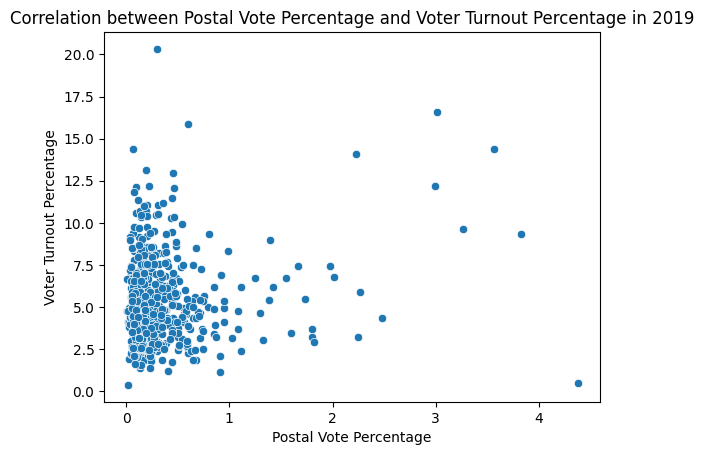

Correlation between postal vote percentage and voter turnout percentage in 2019: 0.14877974016986353


In [471]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_2014 and df_2019 are your dataframes for the election results from 2014 and 2019

def calculate_correlation(df, year):
    # Calculate Postal Vote Percentage
    df['postal_vote_percentage'] = (df['postal_votes'] / df['total_votes']) * 100

    # Calculate Voter Turnout Percentage
    df['voter_turnout_percentage'] = (df['total_votes'] / df['total_electors']) * 100

    # Group by constituency to get unique postal vote and turnout percentages
    constituency_data = df.groupby('pc_name').agg({
        'postal_vote_percentage': 'mean',
        'voter_turnout_percentage': 'mean'
    }).reset_index()

    # Calculate the correlation between postal vote percentage and voter turnout percentage
    correlation = constituency_data['postal_vote_percentage'].corr(constituency_data['voter_turnout_percentage'])

    # Plot the scatter plot
    sns.scatterplot(x='postal_vote_percentage', y='voter_turnout_percentage', data=constituency_data)
    plt.title(f'Correlation between Postal Vote Percentage and Voter Turnout Percentage in {year}')
    plt.xlabel('Postal Vote Percentage')
    plt.ylabel('Voter Turnout Percentage')
    plt.savefig("Correlation between postal vote percentage and voter turnout percentage in 2014.png")
    plt.show()

    return correlation

# Calculate and print correlation for 2014
correlation_2014 = calculate_correlation(df_2019, 2019)
print(f"Correlation between postal vote percentage and voter turnout percentage in 2019: {correlation_2019}")

# Calculate and print correlation for 2019
#correlation_2019 = calculate_correlation(df_2019, 2019)
#print(f"Correlation between postal vote percentage and voter turnout percentage in 2019: {correlation_2019}")


In [ ]:
###Both years show a positive correlation, but the strength of the correlation is relatively weak. This means that while there is a slight tendency for higher postal vote percentages to be associated with higher voter turnout percentages, other factors likely play a significant role in determining voter turnout. The correlation is not strong enough to make definitive predictions based solely on postal vote percentages.